Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Vinay Maruri"
COLLABORATORS = ""

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

## Objective

In this lab you will get some practice plotting, applying data transformations, and working with kernel density estimators.  We will be working with data from the World Bank containing various statistics for countries and territories around the world.  

## Loading Data

In [3]:
import ds100_utils

data_dir = 'data'
data_url = 'http://www.ds100.org/fa18/assets/datasets/lab04_data.zip'
file_name = 'lab04_data.zip'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, file=file_name, data_dir=data_dir)
print(f'Located at {dest_path}')

Using cached version that was downloaded (UTC): Sun Sep 16 19:00:27 2018
Located at data/lab04_data.zip


Here, the ZIP archive contains a data folder with a few files in it. This is similar to what you had in lab 3.

To get the CSV files we want to work with, directly extract the data folder in the zip archive into the `data` directory.

In [4]:
my_zip = zipfile.ZipFile(dest_path, 'r')
my_zip.extractall(data_dir)

Now, let us load some World Bank data into a pandas.DataFrame object named ```wb```.

In [5]:
wb = pd.read_csv("data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


This table contains some interesting columns.  Take a look:

In [6]:
list(wb.columns)

['Primary completion rate: Male: % of relevant age group: 2015',
 'Primary completion rate: Female: % of relevant age group: 2015',
 'Lower secondary completion rate: Male: % of relevant age group: 2015',
 'Lower secondary completion rate: Female: % of relevant age group: 2015',
 'Youth literacy rate: Male: % of ages 15-24: 2005-14',
 'Youth literacy rate: Female: % of ages 15-24: 2005-14',
 'Adult literacy rate: Male: % ages 15 and older: 2005-14',
 'Adult literacy rate: Female: % ages 15 and older: 2005-14',
 'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
 'Population: millions: 2016',
 'Surface area: sq. km thousands: 2016',
 'Population density: people per sq. km: 2016',
 'Gross national income, Atlas method: $ billions: 2016',
 'Gross national income per capita, Atlas method: $: 2016',
 'Purchasin

# Part 1: Scaling

In the first part of this assignment we will look at the distribution of values for female adult literacy rate as well as the gross national income per capita. The code below creates a copy of the dataframe that contains only the two Series we want, and then drops all rows that contain null values in either column. 

In [7]:
#creates a dataframe with the appropriate index
df = pd.DataFrame(index=wb.index)

#copies the Series we want
df['lit'] = wb['Adult literacy rate: Female: % ages 15 and older: 2005-14']
df['inc'] = wb['Gross national income per capita, Atlas method: $: 2016']

#the line below drops all records that have a NaN value in either column
df.dropna(inplace=True)
print("Original records:", len(wb))
print("Final records:", len(df))

Original records: 216
Final records: 147


In [8]:
df.head(5)

,lit,inc
Afghanistan,18.0,580.0
Albania,96.0,4250.0
Algeria,68.0,4270.0
Angola,60.0,3440.0
Antigua and Barbuda,99.0,13400.0


## Question 1a

Suppose we wanted to build a histogram of our data to understand the distribution of literacy rates and income per capita individually. Last week, we saw that `countplot` creates histograms from categorical data. 

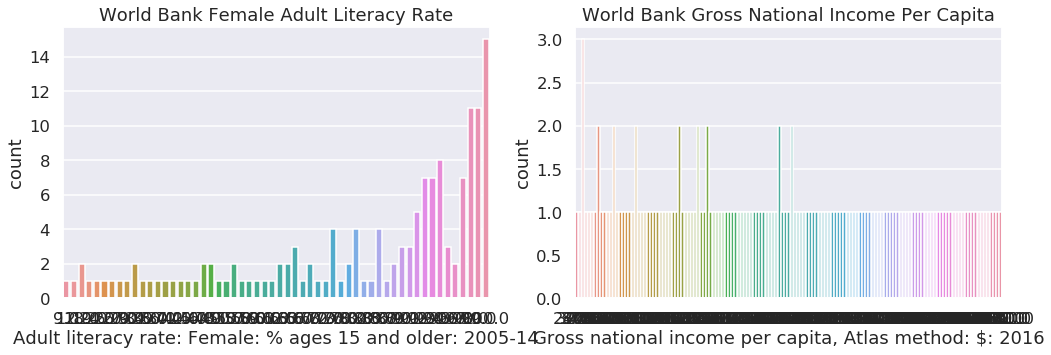

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(df['lit'])
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.countplot(df['inc'])
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

In the cell below, concisely explain why `countplot` is NOT the right tool for the job.

In [10]:
q1a = "Countplot is not the right graph to use to understand the distribution of literacy rates and per capita income individually because countplot is a good visualization for categorical data. However, literacy rates and per capita income are quantitative datasets that are not divided into groups. Hence, a histogram/countplot is ill-suited to visualize these datasets because there is no meaningful way to bin the data on the x-axis. This is shown by the unreadable x-axis bins in the above plots, as each bin represents an individual country, meaning there are 147 bins on the x-axis."

In [11]:
assert 'categorical' in q1a and 'quantitative' in q1a

An alternate type of plot is the `barplot`, which as you'll see below, provides some vague idea of the distribution, but this is also not what we want.

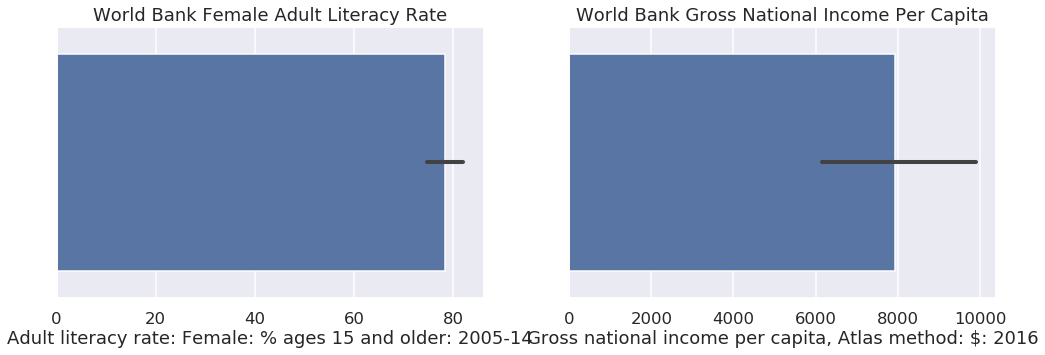

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(df['lit'])
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.barplot(df['inc'])
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

## Question 1b

In the cell below, create a plot of literacy rate and income per capita using the `distplot` function. As above, you should have two subplots, where the left subplot is literacy, and the right subplot is income. When you call `distplot`, set the `kde` parameter to false, e.g. `distplot(s, kde=False)`.

Don't forget to title the plot and label axes!

**Hint: ** *Copy and paste from above to start.*

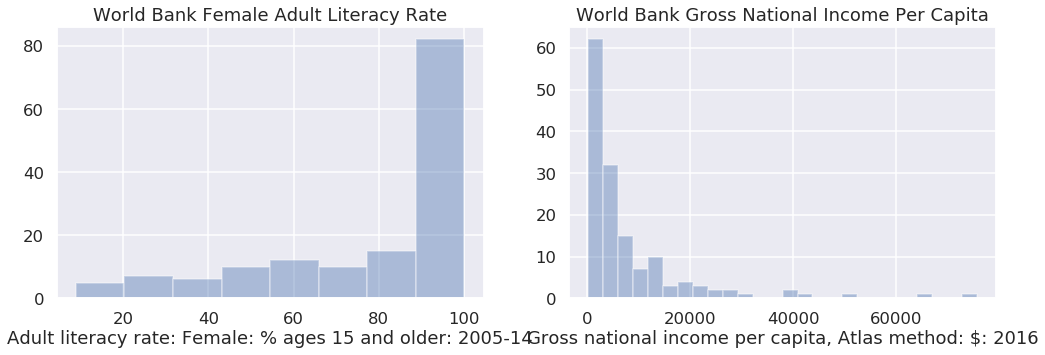

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['lit'], kde = False)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.distplot(df['inc'], kde = False)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

You should see histograms that show the counts of how many data points appear in each bin. `distplot` uses a heuristic called the Freedman-Diaconis rule to automatically identify the best bin sizes, though it is possible to set the bins yourself (we won't).

In the cell below, try creating the exact same plot again, but this time set the `kde` parameter to False and the `rug` parameter to True.

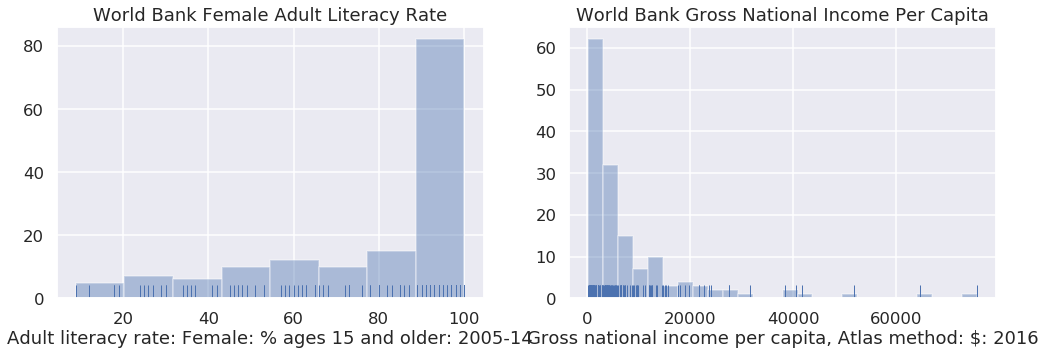

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['lit'], kde = False, rug = True)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.distplot(df['inc'], kde = False, rug = True)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

Above, you should see little lines at the bottom of the plot showing the actual data points. In the cell below, let's do one last tweak and plot with the `kde` parameter set to True.

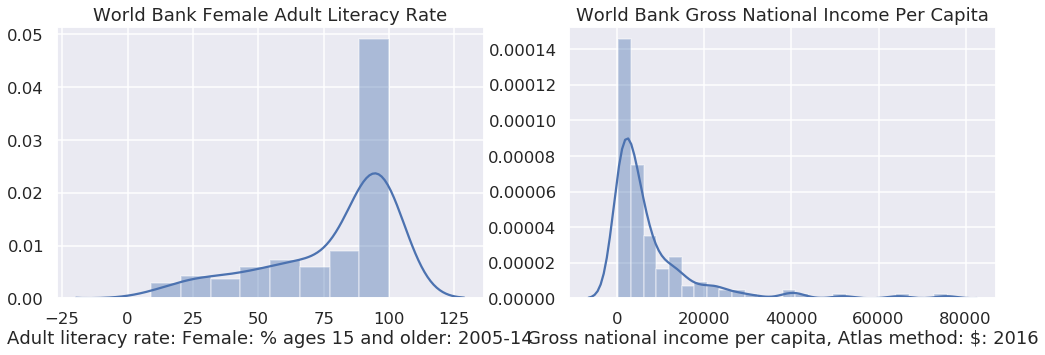

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['lit'], kde = True)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.distplot(df['inc'], kde = True)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

You should see roughly the same histogram as before. However, now you should see an overlaid smooth line. This is the kernel density estimate discussed in class. 

Observations:
* You'll also see that the y-axis value is no longer the count. Instead it is a value such tha the total area under the KDE curve is 1. The KDE estimates the underlying probability density function of the given variable. 
* The KDE is just an estimate, and we can see that it makes some silly decisions, e.g. assigning a non-zero probability of a greater than 100% literacy rate. 

We'll talk more about KDEs later in this lab.

## Question 1c

Looking at the income data, it is difficult to see the distribution among high income (> $30000) countries, and the KDE also has a funny artifact where the probability density function has little bumps just above zero that correspond to the wealthy outlying countries.

We can logarithmically transform the `inc` data to give us a visual representation that makes it easier to see patterns and also give a more reasonable KDE.

In the cell below, make a distribution plot with the data transformed using `np.log10` with `kde=True`. Be sure to correct the axis label using `plt.xlabel`. If you want to see the exact counts, just set `kde=False`.

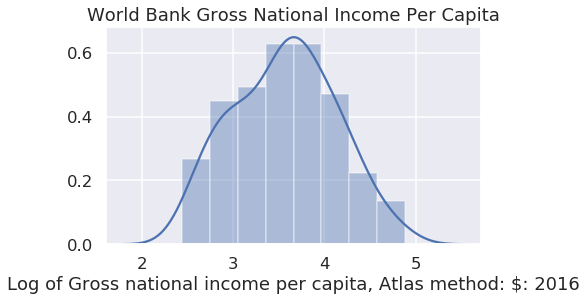

In [16]:
plt.figure()
sns.distplot(np.log10(df['inc']), kde = True)
plt.xlabel('Log of Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

# Part 2: Kernel Density Estimation

In this part of the lab you will develop a deeper understanding of how kernel destiny estimation works. This section assumes you watched lecture 6 and are familiar with the basic idea of the KDE.

Suppose we have 3 data points with values 2, 4, and 9. We can compute the (useless) histogram as shown below.

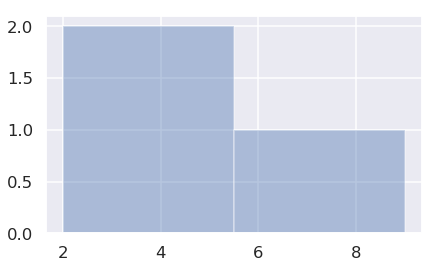

In [17]:
data3pts = np.array([2, 4, 9])
sns.distplot(data3pts, kde = False);

By setting `kde=True`, we can see a kernel density estimate of the data.

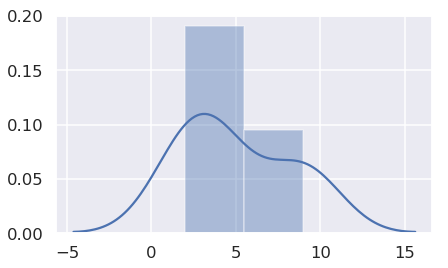

In [18]:
sns.distplot(data3pts, kde = True);

One question you might be wondering is how the kernel density estimator decides how "wide" each point should be. It turns out this is a parameter you can set called `bw`, which stands for bandwith. For example, the code below gives a bandwith value of 0.5 to each data point. You'll see the resulting kde is quite different. Try experimenting with different values of bandwidth and see what happens.

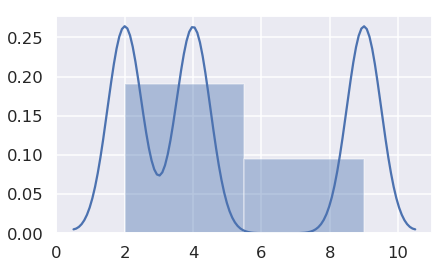

In [19]:
sns.distplot(data3pts, kde = True, kde_kws = {"bw": 0.5});

## Question 2a

As mentioned in class, the kernel density estimate is just the sum of a bunch of copies of the kernel, each centered on our data points. For those of you familiar with the idea of "convolution", the KDE is simply the convolution of the kernel with the data. The default kernel used by the `distplot` function is the Guassian kernel, given by:

$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - z)^2}{2  \alpha ^2} \right)
$$

In Python code, this function is given as below, where `alpha` is the parameter $\alpha$, `z` is the x coordinate of the center of the Gaussian (i.e. a data point), and `x` is the independent variable.

In [20]:
def gaussian_kernel(alpha, x, z):
    return 1.0/np.sqrt(2. * np.pi * alpha**2) * np.exp(-(x - z) ** 2 / (2.0 * alpha**2))

For example, we can plot the gaussian kernel centered on $x$ coordinate 9 with $\alpha$ = 0.5 as below: 

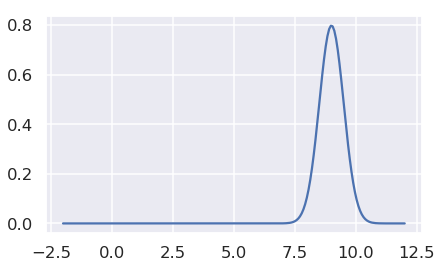

In [21]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
kde_curve = [gaussian_kernel(alpha, x, 9) for x in xs]
plt.plot(xs, kde_curve);

In the cell below, plot the 3 kernel density functions corresponding to our 3 data points on the same axis. Use an `alpha` value of 0.5.

**Hint: ** *The `gaussian_kernel` function can take a numpy array as an argument for `z`*.

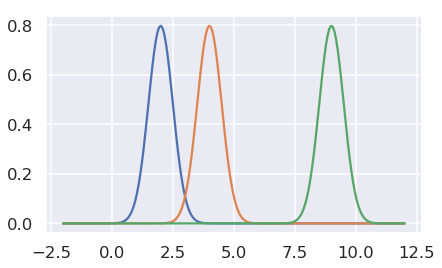

In [22]:
alpha = 0.5
kdE_curve = [gaussian_kernel(alpha, x, data3pts) for x in xs]
plt.plot(xs, kdE_curve)

In the cell below, create a plot showing the sum of all three of the kernels above. Your plot should closely resemble the kde shown when you called `distplot` function with bandwidth 0.5 earlier.

**Hint: ** *Consider using np.sum with the argument `axis = 1`.*

**Hint: ** *Make sure to normalize your kernels!*

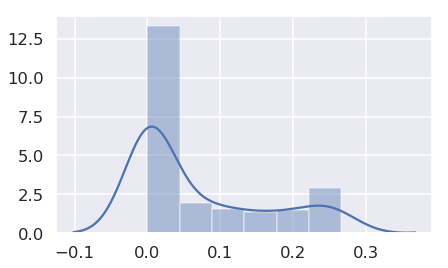

In [23]:
sns.distplot((np.sum(kdE_curve, axis = 1))/3, kde = True)

## Question 2b

Recall that earlier we plotted the kernel density estimation for the logarithm of the income data, as shown again below.

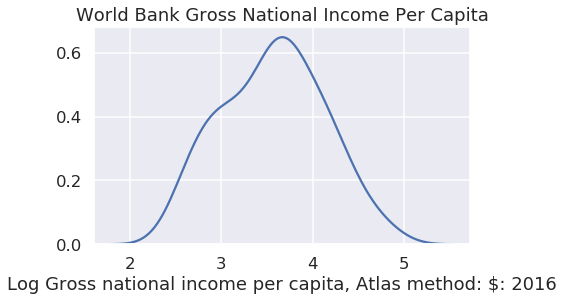

In [24]:
ax = sns.distplot(np.log10(df['inc']), hist=False)
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');

In the cell below, make a similar plot using your technique from question 2a. Give an estimate of the $\alpha$ value chosen by the `sns.distplot` function by tweaking your `alpha` value until your plot looks almost the same.

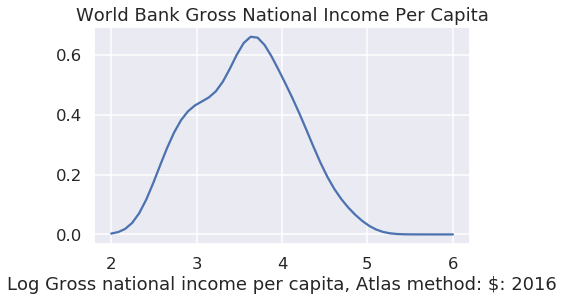

In [25]:
xp = np.linspace(2,6)
alpha=0.2
kDE_curve = np.sum([gaussian_kernel(alpha, x, np.log10(df['inc'])) for x in xp], axis = 1)/147
plt.plot(xp, kDE_curve)
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');

In [26]:
print("I estimate the alpha value of the sns.distplot function to be 0.2.")

I estimate the alpha value of the sns.distplot function to be 0.2.


## Question 2c

In your answers above, you hard coded a lot of your work. In this problem, you'll build a more general kernel density estimator function.

Implement the KDE function which computes:

$$\Large
f_\alpha(x) = \frac{1}{n} \sum_{i=1}^n K_\alpha(x, z_i)
$$

Where $z_i$ are the data, $\alpha$ is a parameter to control the smoothness, and $K_\alpha$ is the kernel density function passed as `kernel`.

In [27]:
def kde(kernel, alpha, x, data):
    """
    Compute the kernel density estimate for the single query point x.

    Args:
        kernel: a kernel function with 3 parameters: alpha, x, data
        alpha: the smoothing parameter to pass to the kernel
        x: a single query point (in one dimension)
        data: a numpy array of data points

    Returns:
        The smoothed estimate at the query point x
    """
    return (1/len(data)) * np.sum(kernel(alpha, x, data))

In [28]:
assert np.isclose(kde(gaussian_kernel, 1.0, 2.0, np.array([3.0, 4.0, 5.0, 7.0])), 0.075099)

Assuming you implemented `kde` correctly, the code below should generate the `kde` of the log of the income data as before.

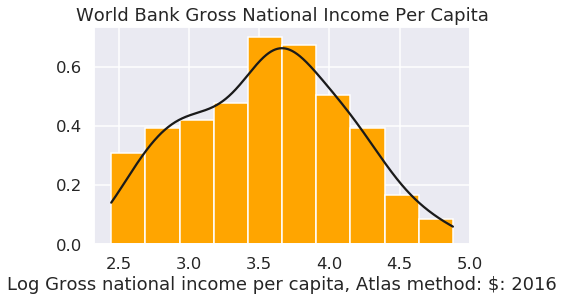

In [29]:
df['trans_inc'] = np.log10(df['inc'])
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
plt.hist(df['trans_inc'], normed=True, color='orange')
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');
plt.plot(xs, curve, 'k-');

And the code below should show a 3 x 3 set of plots showing the output of the kde for different `alpha` values.

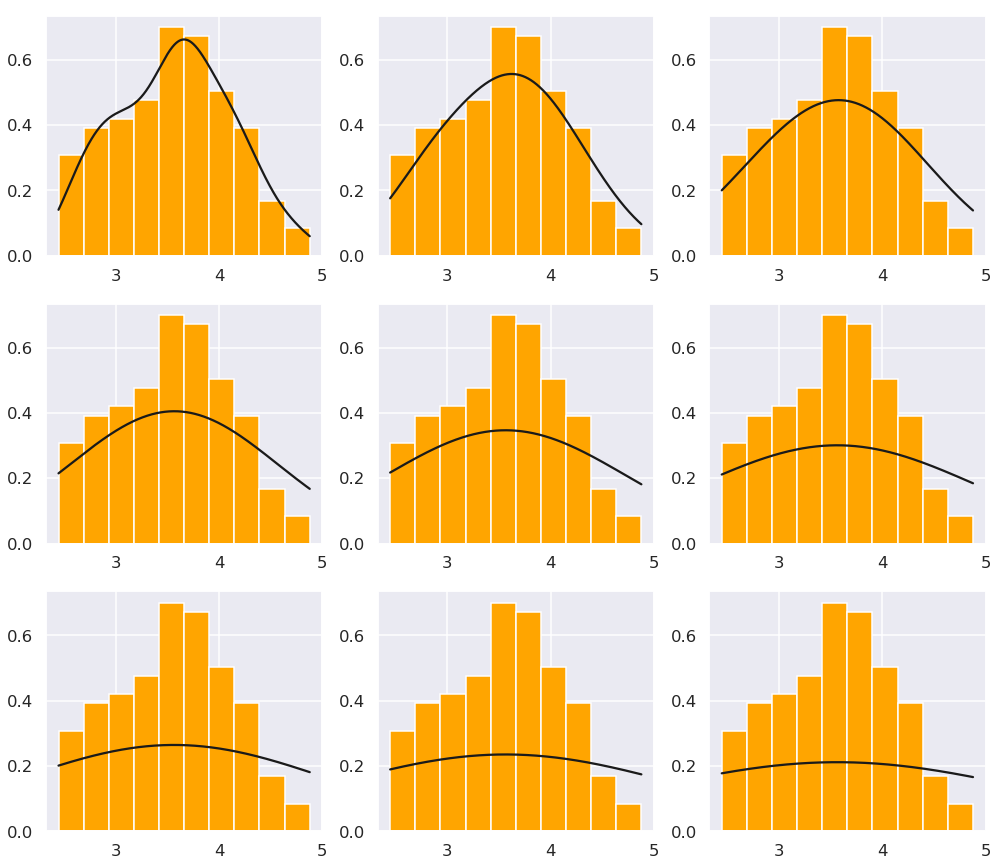

In [30]:
plt.figure(figsize=(15,15))
alphas = np.arange(0.2, 2.0, 0.2)
for i, alpha in enumerate(alphas):
    plt.subplot(3, 3, i+1)
    xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
    curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
    plt.hist(df['trans_inc'], normed=True, color='orange')
    plt.plot(xs, curve, 'k-')
plt.show()

Let's take a look at another kernel, the Boxcar kernel.

In [31]:
def boxcar_kernel(alpha, x, z):
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

Run the cell below to enable interactive plots. It should give you a green 'OK' when it's finished.

In [32]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Now, we can plot the Boxcar and Gaussian kernel functions to see what they look like.

In [33]:
x = np.linspace(-10,10,1000)
def f(alpha):
    plt.plot(x, boxcar_kernel(alpha,x,0), label='Boxcar')
    plt.plot(x, gaussian_kernel(alpha,x,0), label='Gaussian')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha=(1,10,0.1));

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, min=1.0), Output()), _dom_classes=('widget-interact',))

Using the interactive plot below compare the the two kernel techniques:  (Generating the KDE plot is slow, so you may expect some latency after you move the slider)

In [34]:
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
def f(alpha_g, alpha_b):
    plt.hist(df['trans_inc'], normed=True, color='orange')
    g_curve = [kde(gaussian_kernel, alpha_g, x, df['trans_inc']) for x in xs]
    plt.plot(xs, g_curve, 'k-', label='Gaussian')
    b_curve = [kde(boxcar_kernel, alpha_b, x, df['trans_inc']) for x in xs]
    plt.plot(xs, b_curve, 'r-', label='Boxcar')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1));

interactive(children=(FloatSlider(value=0.25, description='alpha_g', max=0.5, min=0.01, step=0.01), FloatSlider(value=1.4100000000000001, description='alpha_b', max=3.0, min=0.01), Output()), _dom_classes=('widget-interact',))

Briefly compare and contrast the Gaussian and Boxcar kernels in the cell below.

The Gaussian kernel is a smooth function that is a weighted average of the individual kernels at each point to form the density curve. The Boxcar kernel is a jagged, non-smooth function that varies significantly in distribution shape compared to the Gaussian kernel distribution, as the alphas get adjusted up or down. 

**Congrats! You are finished with this assignment. Don't forget to validate & submit before 11:59PM!**

## Submission

You're done!

Before submitting this assignment, ensure to:

1. Restart the Kernel (in the menubar, select Kernel->Restart & Run All)
2. Validate the notebook by clicking the "Validate" button

Finally, make sure to **submit** the assignment via the Assignments tab in Datahub